In [39]:
 #steps
 #Initialize model: Prophet()
 #Set columns as ds.y
 #Fit dataset: Prophet().fit()
 #Creates Dates to predict:Prophet().make_future_dataframe(periods=365)
 #Predict:Prophet().predict(future_dates)
 #Plot prophet().plot(predictions)

In [2]:
# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pandas_datareader as web
import datetime as dt
from prophet import Prophet

FORECAST_IN_DAYS = 7
COIN_TO_PREDICT = "ETH"

In [3]:
# load dataset from web
def load_data_yahoo(stock):
    return web.DataReader(stock, 'yahoo', dt.datetime(2016, 1, 1), dt.datetime.now())

In [4]:
coins = {"Bitcoin" : "BTC", "Etherum" : "ETH", "Tether" : "USDT", "Usd coin" : "USDC", "Binance coin" : "BNB", "Cardano" : "ADA", "Xrp" : "XRP", "Binance usd" : "BUSD", "Solana" : "SOL", "Doge coin" : "DOGE", "Polkadot" : "DOT", "Wrapped bitcoin" : "WBTC", "Dai" : "DAI", "Litecoin" : "LTC", "Avalanche" : "AVAX", "Uniswap" : "UNI", "True usd" : "TUSD", "Filecoin" : "FIL", "Monero" : "XMR" }
coin_frame = {}

In [5]:
for key, value in coins.items():
    df = load_data_yahoo(value+"-USD")
    coin_frame[value] = df


In [6]:
coin_frame

{'BTC':                     High           Low          Open         Close  \
 Date                                                                 
 2016-01-01    436.246002    427.515015    430.721008    434.334015   
 2016-01-02    436.062012    431.869995    434.622009    433.437988   
 2016-01-03    433.743011    424.705994    433.578003    430.010986   
 2016-01-04    434.516998    429.084015    430.061005    433.091003   
 2016-01-05    434.182007    429.675995    433.069000    431.959991   
 ...                  ...           ...           ...           ...   
 2022-08-07  23359.009766  22894.556641  22963.505859  23175.890625   
 2022-08-08  24203.689453  23176.546875  23179.527344  23809.486328   
 2022-08-09  23898.615234  22982.000000  23811.484375  23164.318359   
 2022-08-10  24127.414062  22771.519531  23162.898438  23947.642578   
 2022-08-11  24669.126953  23956.478516  23984.750000  24421.849609   
 
                  Volume     Adj Close  
 Date                      

In [7]:
df.skew()

High          0.964795
Low           0.883141
Open          0.927159
Close         0.925309
Volume       21.396924
Adj Close     0.925309
dtype: float64

In [8]:
df.isnull()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-09,False,False,False,False,False,False
2017-11-10,False,False,False,False,False,False
2017-11-11,False,False,False,False,False,False
2017-11-12,False,False,False,False,False,False
2017-11-13,False,False,False,False,False,False
...,...,...,...,...,...,...
2022-08-07,False,False,False,False,False,False
2022-08-08,False,False,False,False,False,False
2022-08-09,False,False,False,False,False,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1737 entries, 2017-11-09 to 2022-08-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1737 non-null   float64
 1   Low        1737 non-null   float64
 2   Open       1737 non-null   float64
 3   Close      1737 non-null   float64
 4   Volume     1737 non-null   int64  
 5   Adj Close  1737 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 95.0 KB


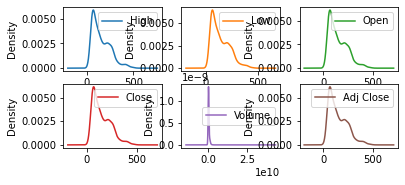

In [10]:

df.plot(kind='density',subplots= True, layout = (3,3), sharex = False)
plt.show()

In [11]:
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

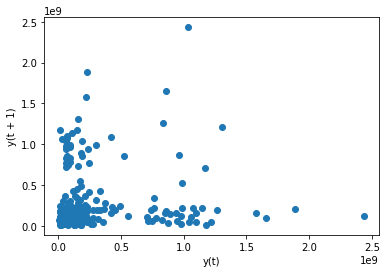

In [12]:
lag_plot(df['Volume'].sample(250))

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

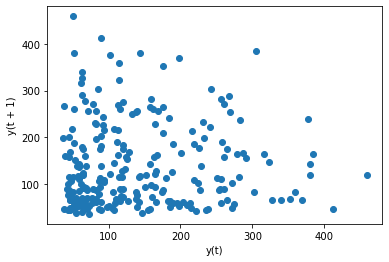

In [13]:
lag_plot(df['Close'].sample(250))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

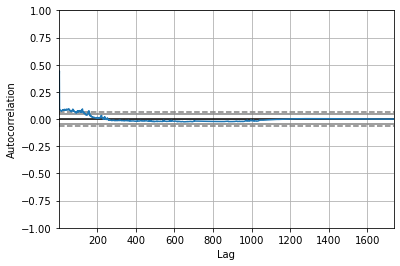

In [14]:
autocorrelation_plot(df['Volume'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

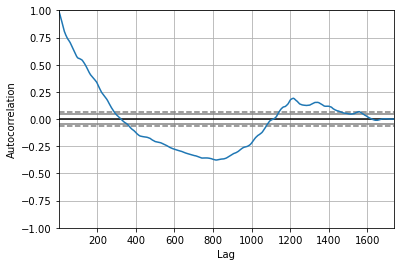

In [15]:
autocorrelation_plot(df['Close'])

In [16]:
#works with a ds and y columns names
coin_df = coin_frame[COIN_TO_PREDICT]
coin_df.reset_index(inplace=True)
coin_df = coin_df.rename(columns={'Date' : 'ds', 'Close' : 'y'})
coin_df

,ds,High,Low,Open,y,Volume,Adj Close
0,2017-11-09,329.451996,307.056000,308.644989,320.884003,893249984,320.884003
1,2017-11-10,324.717987,294.541992,320.670990,299.252991,885985984,299.252991
2,2017-11-11,319.453003,298.191986,298.585999,314.681000,842300992,314.681000
3,2017-11-12,319.153015,298.513000,314.690002,307.907990,1613479936,307.907990
4,2017-11-13,328.415009,307.024994,307.024994,316.716003,1041889984,316.716003
...,...,...,...,...,...,...,...
1732,2022-08-07,1724.789185,1672.908447,1691.777954,1699.350830,10252090340,1699.350830
1733,2022-08-08,1806.886475,1697.407959,1699.693481,1775.516113,16841424404,1775.516113
1734,2022-08-09,1786.122559,1675.849854,1776.071289,1703.025024,16368619692,1703.025024
1735,2022-08-10,1869.400635,1665.090454,1702.906494,1851.742676,23512477984,1851.742676


In [17]:
# Train test split
df_train = coin_df[coin_df['ds']<='2020-12-25']
df_test = coin_df[coin_df['ds']>'2020-12-25']
df_train


,ds,High,Low,Open,y,Volume,Adj Close
0,2017-11-09,329.451996,307.056000,308.644989,320.884003,893249984,320.884003
1,2017-11-10,324.717987,294.541992,320.670990,299.252991,885985984,299.252991
2,2017-11-11,319.453003,298.191986,298.585999,314.681000,842300992,314.681000
3,2017-11-12,319.153015,298.513000,314.690002,307.907990,1613479936,307.907990
4,2017-11-13,328.415009,307.024994,307.024994,316.716003,1041889984,316.716003
...,...,...,...,...,...,...,...
1138,2020-12-21,646.846558,600.836060,638.315186,609.817871,14419493621,609.817871
1139,2020-12-22,635.076599,589.552002,609.420532,634.854187,14745890080,634.854187
1140,2020-12-23,637.122803,560.364258,634.824585,583.714600,15261413038,583.714600
1141,2020-12-24,613.815186,568.596375,584.135620,611.607178,14317413703,611.607178


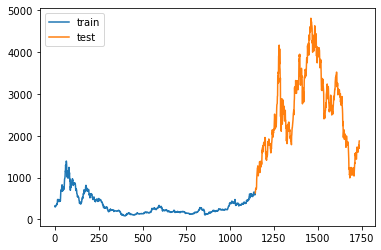

In [18]:
plt.plot(df_train.y, label='train')
plt.plot(df_test.y, label='test')
plt.legend()
plt.show()

In [19]:
df_test

,ds,High,Low,Open,y,Volume,Adj Close
1143,2020-12-26,650.721436,617.402100,626.498047,635.835815,14761125202,635.835815
1144,2020-12-27,711.393555,628.334961,635.887146,682.642334,26093552821,682.642334
1145,2020-12-28,745.877747,683.205811,683.205811,730.397339,24222565862,730.397339
1146,2020-12-29,737.952881,692.149414,730.358704,731.520142,18710683199,731.520142
1147,2020-12-30,754.303223,720.988892,731.472839,751.618958,17294574210,751.618958
...,...,...,...,...,...,...,...
1732,2022-08-07,1724.789185,1672.908447,1691.777954,1699.350830,10252090340,1699.350830
1733,2022-08-08,1806.886475,1697.407959,1699.693481,1775.516113,16841424404,1775.516113
1734,2022-08-09,1786.122559,1675.849854,1776.071289,1703.025024,16368619692,1703.025024
1735,2022-08-10,1869.400635,1665.090454,1702.906494,1851.742676,23512477984,1851.742676


In [20]:
#initialize the model with confidence interval of 95%
model = Prophet(interval_width=0.95)

#Fit the model using the train dataset
model.fit(df_train)


08:59:27 - cmdstanpy - INFO - Chain [1] start processing
08:59:28 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
#create future date of periods
future_dates = model.make_future_dataframe(periods=FORECAST_IN_DAYS)

In [22]:
#make prediction with the model
prediction = model.predict(future_dates)
prediction.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1145,2020-12-28,597.138356,522.421552,784.178502,597.133720,597.385196,54.164782,54.164782,54.164782,1.266407,1.266407,1.266407,52.898375,52.898375,52.898375,0.0,0.0,0.0,651.303138
1146,2020-12-29,598.876893,529.108583,784.075754,598.501245,599.332388,60.808055,60.808055,60.808055,0.603831,0.603831,0.603831,60.204224,60.204224,60.204224,0.0,0.0,0.0,659.684948
1147,2020-12-30,600.615429,550.566864,804.034347,599.770696,601.488386,66.355633,66.355633,66.355633,-1.364708,-1.364708,-1.364708,67.720341,67.720341,67.720341,0.0,0.0,0.0,666.971062
1148,2020-12-31,602.353966,546.190419,803.538290,600.685609,603.755577,72.728034,72.728034,72.728034,-2.646798,-2.646798,-2.646798,75.374832,75.374832,75.374832,0.0,0.0,0.0,675.082000
1149,2021-01-01,604.092502,554.752779,809.576511,601.844634,606.561257,81.372279,81.372279,81.372279,-1.716330,-1.716330,-1.716330,83.088608,83.088608,83.088608,0.0,0.0,0.0,685.464781


In [23]:
# yhat:the predicted forecast
# yhat_lower:the lower boundary of the prediction
# yhat_upper:the upper boundary of the prediction

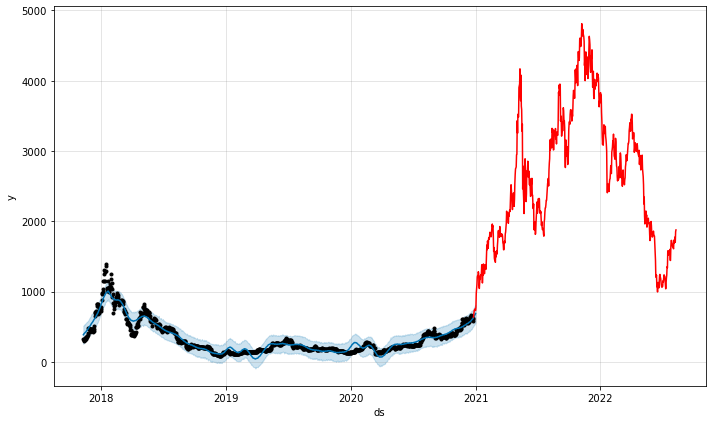

In [24]:
#plot the prediction
fig =model.plot(prediction)
ax = fig.gca()
ax.plot(df_test["ds"], df_test["y"], 'r')

In [25]:
#Black dots:the actual data points in the dataset
#Deep blue line:the predicted forecast/the predicted values
#Light blue line:the bounderies

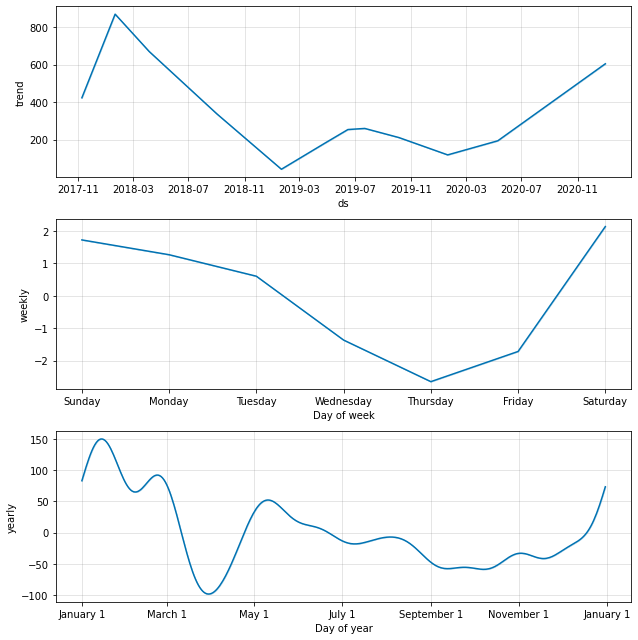

In [37]:
#visualizing each componennt
fig = model.plot_components(prediction)

In [27]:
from prophet.diagnostics import cross_validation

In [28]:
df.shape

(1737, 6)

In [29]:
cv = cross_validation( model = model, initial ='500days', period = '30days', horizon ='60days', parallel = 'processes')

In [30]:
cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-04-06,116.310038,11.554072,209.718201,165.947205,2019-04-05
1,2019-04-07,124.463117,28.640757,227.078093,174.531647,2019-04-05
2,2019-04-08,131.100743,31.295804,229.645870,180.258820,2019-04-05
3,2019-04-09,142.680335,42.474428,242.063737,176.114578,2019-04-05
4,2019-04-10,150.206057,50.977793,250.597522,177.337479,2019-04-05


In [31]:
from prophet.diagnostics import performance_metrics

In [32]:
df_pm = performance_metrics(cv)

In [33]:
df_pm

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,7390.811085,85.969827,61.895331,0.293803,0.208720,0.273675,0.816667
1,7 days,8223.925056,90.685859,65.891419,0.307365,0.208222,0.289896,0.791667
2,8 days,8959.688922,94.655633,69.066696,0.317093,0.202225,0.303441,0.783333
3,9 days,9469.655577,97.312155,71.311585,0.324986,0.199969,0.314807,0.783333
4,10 days,9783.994174,98.914075,73.418388,0.332843,0.203673,0.327134,0.775000
5,11 days,10009.730370,100.048640,75.087986,0.339963,0.204878,0.338164,0.775000
6,12 days,10342.919517,101.700145,76.393739,0.350007,0.209841,0.347137,0.766667
7,13 days,10869.312976,104.255997,78.005666,0.358916,0.212255,0.356234,0.750000
8,14 days,11192.058035,105.792524,79.150056,0.363655,0.223789,0.362962,0.733333
9,15 days,11848.020089,108.848611,81.370695,0.372419,0.236303,0.373071,0.716667


In [34]:
df_pm.columns

Index(['horizon', 'mse', 'rmse', 'mae', 'mape', 'mdape', 'smape', 'coverage'], dtype='object')

In [35]:
mape = df_pm[['mape']]

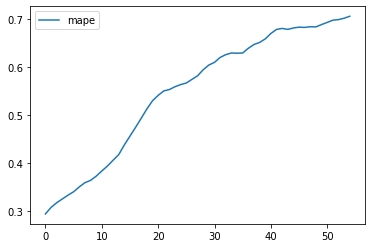

In [36]:
plt.plot(mape, label='mape')
plt.legend()
plt.show()